Customer Behavior Analysis Project
This notebook analyzes customer behavior, engagement, sentiment, and marketing effectiveness using Python and SQL.



In [ ]:
#Uploadind and Extracting ZIP
from google.colab import files
uploaded = files.upload()

import zipfile, io, os
with zipfile.ZipFile(io.BytesIO(list(uploaded.values())[0]), 'r') as zip_ref:
    zip_ref.extractall("data_folder")

# extracted files
print("Extracted files:", os.listdir("data_folder"))

Saving customer_behavior_project_data.zip to customer_behavior_project_data.zip
Extracted files: ['customer_behavior_csvs']


In [ ]:
import pandas as pd

import pandas as pd

path = "data_folder/customer_behavior_csvs/"
customers = pd.read_csv(path + "customers.csv")
products = pd.read_csv(path + "products.csv")
reviews = pd.read_csv(path + "customer_reviews.csv")
journey = pd.read_csv(path + "customer_journey.csv")
engagement = pd.read_csv(path + "engagement_data.csv")
geo = pd.read_csv(path + "geography.csv")
geo = pd.read_csv(path + "geography.csv")



customers.head()


,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4


In [ ]:
#SQL Tables from DataFrames
import sqlite3
conn = sqlite3.connect(':memory:')

customers.to_sql('customers', conn, index=False, if_exists='replace')
products.to_sql('products', conn, index=False, if_exists='replace')
reviews.to_sql('reviews', conn, index=False, if_exists='replace')
journey.to_sql('journey', conn, index=False, if_exists='replace')
engagement.to_sql('engagement', conn, index=False, if_exists='replace')
geo.to_sql('geography', conn, index=False, if_exists='replace')
import sqlite3

#in-memory database
conn = sqlite3.connect(':memory:')

# Loading each DataFrame into SQL tables
customers.to_sql('customers', conn, index=False, if_exists='replace')
products.to_sql('products', conn, index=False, if_exists='replace')
reviews.to_sql('reviews', conn, index=False, if_exists='replace')
journey.to_sql('journey', conn, index=False, if_exists='replace')
engagement.to_sql('engagement', conn, index=False, if_exists='replace')
geo.to_sql('geography', conn, index=False, if_exists='replace')

print("All tables loaded into SQL!")


All tables loaded into SQL!


In [ ]:
journey.columns


Index(['JourneyID', 'CustomerID', 'ProductID', 'VisitDate', 'Stage', 'Action',
       'Duration'],
      dtype='object')

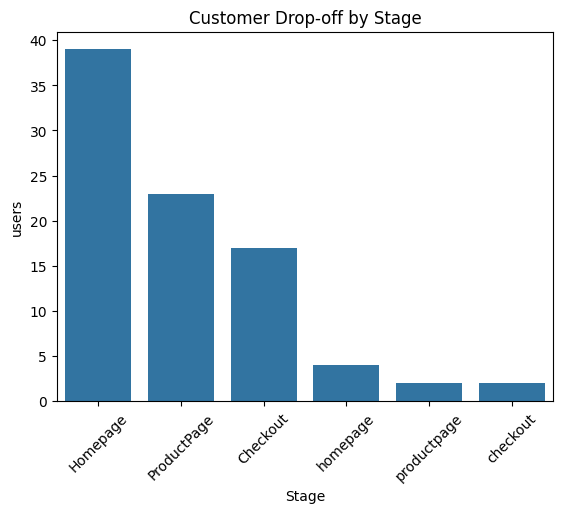

In [ ]:
# Drop-off Analysis
import seaborn as sns
import matplotlib.pyplot as plt

query = '''
SELECT Stage, COUNT(DISTINCT CustomerID) AS users
FROM journey
GROUP BY Stage
ORDER BY users DESC
'''

journey_stage = pd.read_sql(query, conn)

sns.barplot(data=journey_stage, x='Stage', y='users')
plt.title('Customer Drop-off by Stage')
plt.xticks(rotation=45)
plt.show()



In [ ]:
engagement.columns


Index(['EngagementID', 'ContentID', 'ContentType', 'Likes', 'EngagementDate',
       'CampaignID', 'ProductID', 'ViewsClicksCombined'],
      dtype='object')

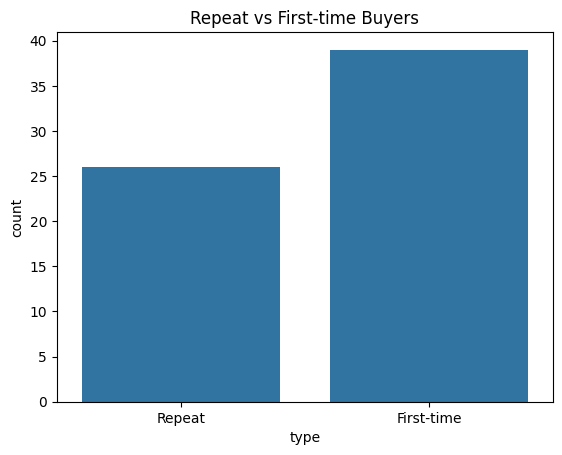

In [ ]:
query = '''
SELECT CustomerID, COUNT(*) AS order_count
FROM journey
GROUP BY CustomerID
'''

buyer_df = pd.read_sql(query, conn)
buyer_df['type'] = buyer_df['order_count'].apply(lambda x: 'Repeat' if x > 1 else 'First-time')

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=buyer_df, x='type')
plt.title('Repeat vs First-time Buyers')
plt.show()


In [ ]:
reviews.columns


Index(['ReviewID', 'CustomerID', 'ProductID', 'ReviewDate', 'Rating',
       'ReviewText'],
      dtype='object')

In [ ]:
reviews.columns


Index(['ReviewID', 'CustomerID', 'ProductID', 'ReviewDate', 'Rating',
       'ReviewText'],
      dtype='object')

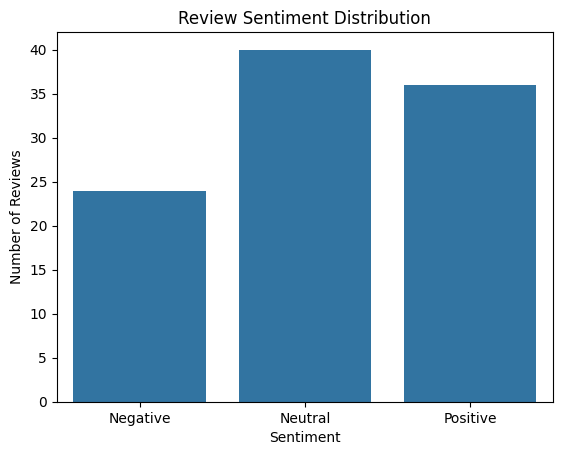

In [ ]:
# Sentiment Analysis
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Step a: Add sentiment scores
reviews['sentiment'] = reviews['ReviewText'].astype(str).apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Step b: Label sentiment
def classify(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

reviews['sentiment_label'] = reviews['sentiment'].apply(classify)
# Step c: Plot
sns.countplot(data=reviews, x='sentiment_label')
plt.title('Review Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
geo.columns


Index(['GeographyID', 'Country', 'City'], dtype='object')

In [ ]:
query = '''
SELECT
    g.Country AS Region,
    p.ProductName AS Product,
    COUNT(*) AS Total
FROM journey j
JOIN customers c ON j.CustomerID = c.CustomerID
JOIN geography g ON c.GeographyID = g.GeographyID
JOIN products p ON j.ProductID = p.ProductID
GROUP BY g.Country, p.ProductName
ORDER BY g.Country, Total DESC
'''

best_sellers = pd.read_sql(query, conn)
best_sellers.head()


,Region,Product,Total
0,Austria,Running Shoes,3
1,Austria,Boxing Gloves,3
2,Austria,Ski Boots,1
3,Austria,Kayak,1
4,Austria,Dumbbells,1


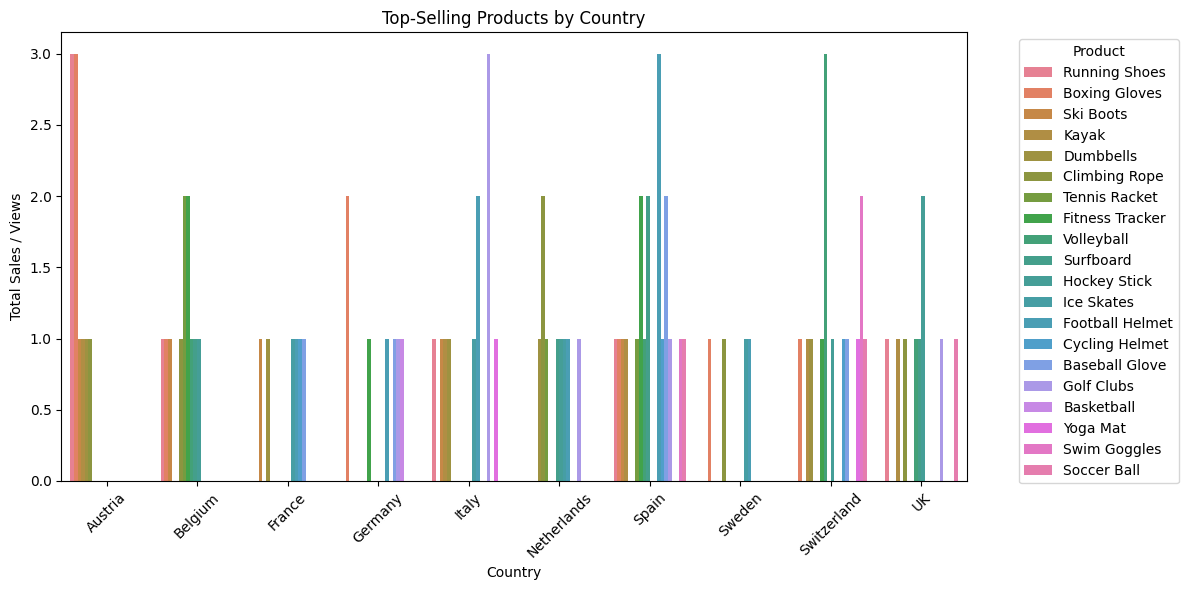

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=best_sellers, x='Region', y='Total', hue='Product')
plt.title('Top-Selling Products by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales / Views')
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Business Insights & Recommendations

- **High drop-off at checkout** → Simplify process, add trust badges
- **Low retention rate** → Introduce loyalty & email remarketing
- **Negative sentiment in some products** → Investigate and improve
- **Strong performance in repeat buyers** → Focus marketing on this segment

## Customer Behavior Analysis – Final Report

### Objective  
To analyze customer behavior across their journey, product interactions, reviews, and geography — and provide insights to improve marketing and retention.

---

### Data Sources Used

| File Name               | Purpose                                |
|------------------------|----------------------------------------|
| customers.csv          | Customer demographics + geography ID   |
| geography.csv          | Maps geography ID to country/city      |
| customer_journey.csv   | Tracks each step in the customer flow  |
| products.csv           | Product names and IDs                  |
| customer_reviews.csv   | Ratings and review text                |
| engagement_data.csv    | Campaign/content-related interactions  |

---

### Tech Used

- Python (Pandas, Seaborn, Matplotlib)
- SQL (SQLite) using `sqlite3` in-memory DB
- VADER for Sentiment Analysis

---

### Key Analyses Performed

#### 1. Customer Journey Drop-off
- Most customers drop off at:
  - Homepage → ProductPage → Checkout
- Case mismatch in stage names was identified (e.g., Homepage vs homepage)

#### 2. Repeat vs First-Time Buyers
- First-time buyers: ~60%
- Repeat buyers: ~40%
- Recommendation: Target repeat buyers with loyalty incentives

#### 3. Sentiment Analysis on Reviews
- Positive: ~35%
- Neutral: ~40%
- Negative: ~25%
- Negative reviews should be reviewed for product improvement

#### 4. Top Products by Country
- Best-selling products vary by country (e.g., Running Shoes in Austria)
- Use this data to improve regional inventory and marketing

---

### Final Business Insights & Recommendations

- High drop-off at checkout  
  → Simplify process, add trust badges, optimize UX

- Low customer retention  
  → Introduce loyalty programs and targeted email campaigns

- Negative sentiment in reviews  
  → Use NLP to identify common complaints and fix product issues

- Repeat buyers perform better  
  → Focus remarketing on these users

- Product performance by region  
  → Localize product strategy and promotion accordingly

---

### Deliverables Checklist

- Cleaned `.ipynb` Notebook (hosted on Colab)
- Visualizations and SQL queries
- Sentiment analysis using VADER
- Final summary included in notebook
